In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df['default.payment.next.month']

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [9]:
df['default.payment.next.month'].unique()

array([1, 0])

In [10]:
pd.set_option('display.max_columns', None)
df.iloc[:,1:13].describe().round(4)

LIMIT_BAL         SEX   EDUCATION    MARRIAGE         AGE  \
count    30000.0000  30000.0000  30000.0000  30000.0000  30000.0000   
mean    167484.3227      1.6037      1.8531      1.5519     35.4855   
std     129747.6616      0.4891      0.7903      0.5220      9.2179   
min      10000.0000      1.0000      0.0000      0.0000     21.0000   
25%      50000.0000      1.0000      1.0000      1.0000     28.0000   
50%     140000.0000      2.0000      2.0000      2.0000     34.0000   
75%     240000.0000      2.0000      2.0000      2.0000     41.0000   
max    1000000.0000      2.0000      6.0000      3.0000     79.0000   

            PAY_0       PAY_2       PAY_3       PAY_4       PAY_5       PAY_6  \
count  30000.0000  30000.0000  30000.0000  30000.0000  30000.0000  30000.0000   
mean      -0.0167     -0.1338     -0.1662     -0.2207     -0.2662     -0.2911   
std        1.1238      1.1972      1.1969      1.1691      1.1332      1.1500   
min       -2.0000     -2.0000     -2.0000     -2.0000     -2.0000     -2.0000   
25%       -1.0000     -1.0000     -1.0000     -1.0000     -1.0000     -1.0000   
50%        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
75%        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
max        8.0000      8.0000      8.0000      8.0000      8.0000      8.0000   

         BILL_AMT1  
count   30000.0000  
mean    51223.3309  
std     73635.8606  
min   -165580.0000  
25%      3558.7500  
50%     22381.5000  
75%     67091.0000  
max    964511.0000

In [11]:
df.iloc[:,13:24].describe().round(4)

BILL_AMT2     BILL_AMT3    BILL_AMT4    BILL_AMT5    BILL_AMT6  \
count   30000.0000  3.000000e+04   30000.0000   30000.0000   30000.0000   
mean    49179.0752  4.701315e+04   43262.9490   40311.4010   38871.7604   
std     71173.7688  6.934939e+04   64332.8561   60797.1558   59554.1075   
min    -69777.0000 -1.572640e+05 -170000.0000  -81334.0000 -339603.0000   
25%      2984.7500  2.666250e+03    2326.7500    1763.0000    1256.0000   
50%     21200.0000  2.008850e+04   19052.0000   18104.5000   17071.0000   
75%     64006.2500  6.016475e+04   54506.0000   50190.5000   49198.2500   
max    983931.0000  1.664089e+06  891586.0000  927171.0000  961664.0000   

          PAY_AMT1      PAY_AMT2     PAY_AMT3     PAY_AMT4     PAY_AMT5  \
count   30000.0000  3.000000e+04   30000.0000   30000.0000   30000.0000   
mean     5663.5805  5.921163e+03    5225.6815    4826.0769    4799.3876   
std     16563.2804  2.304087e+04   17606.9615   15666.1597   15278.3057   
min         0.0000  0.000000e+00       0.0000       0.0000       0.0000   
25%      1000.0000  8.330000e+02     390.0000     296.0000     252.5000   
50%      2100.0000  2.009000e+03    1800.0000    1500.0000    1500.0000   
75%      5006.0000  5.000000e+03    4505.0000    4013.2500    4031.5000   
max    873552.0000  1.684259e+06  896040.0000  621000.0000  426529.0000   

          PAY_AMT6  
count   30000.0000  
mean     5215.5026  
std     17777.4658  
min         0.0000  
25%       117.7500  
50%      1500.0000  
75%      4000.0000  
max    528666.0000

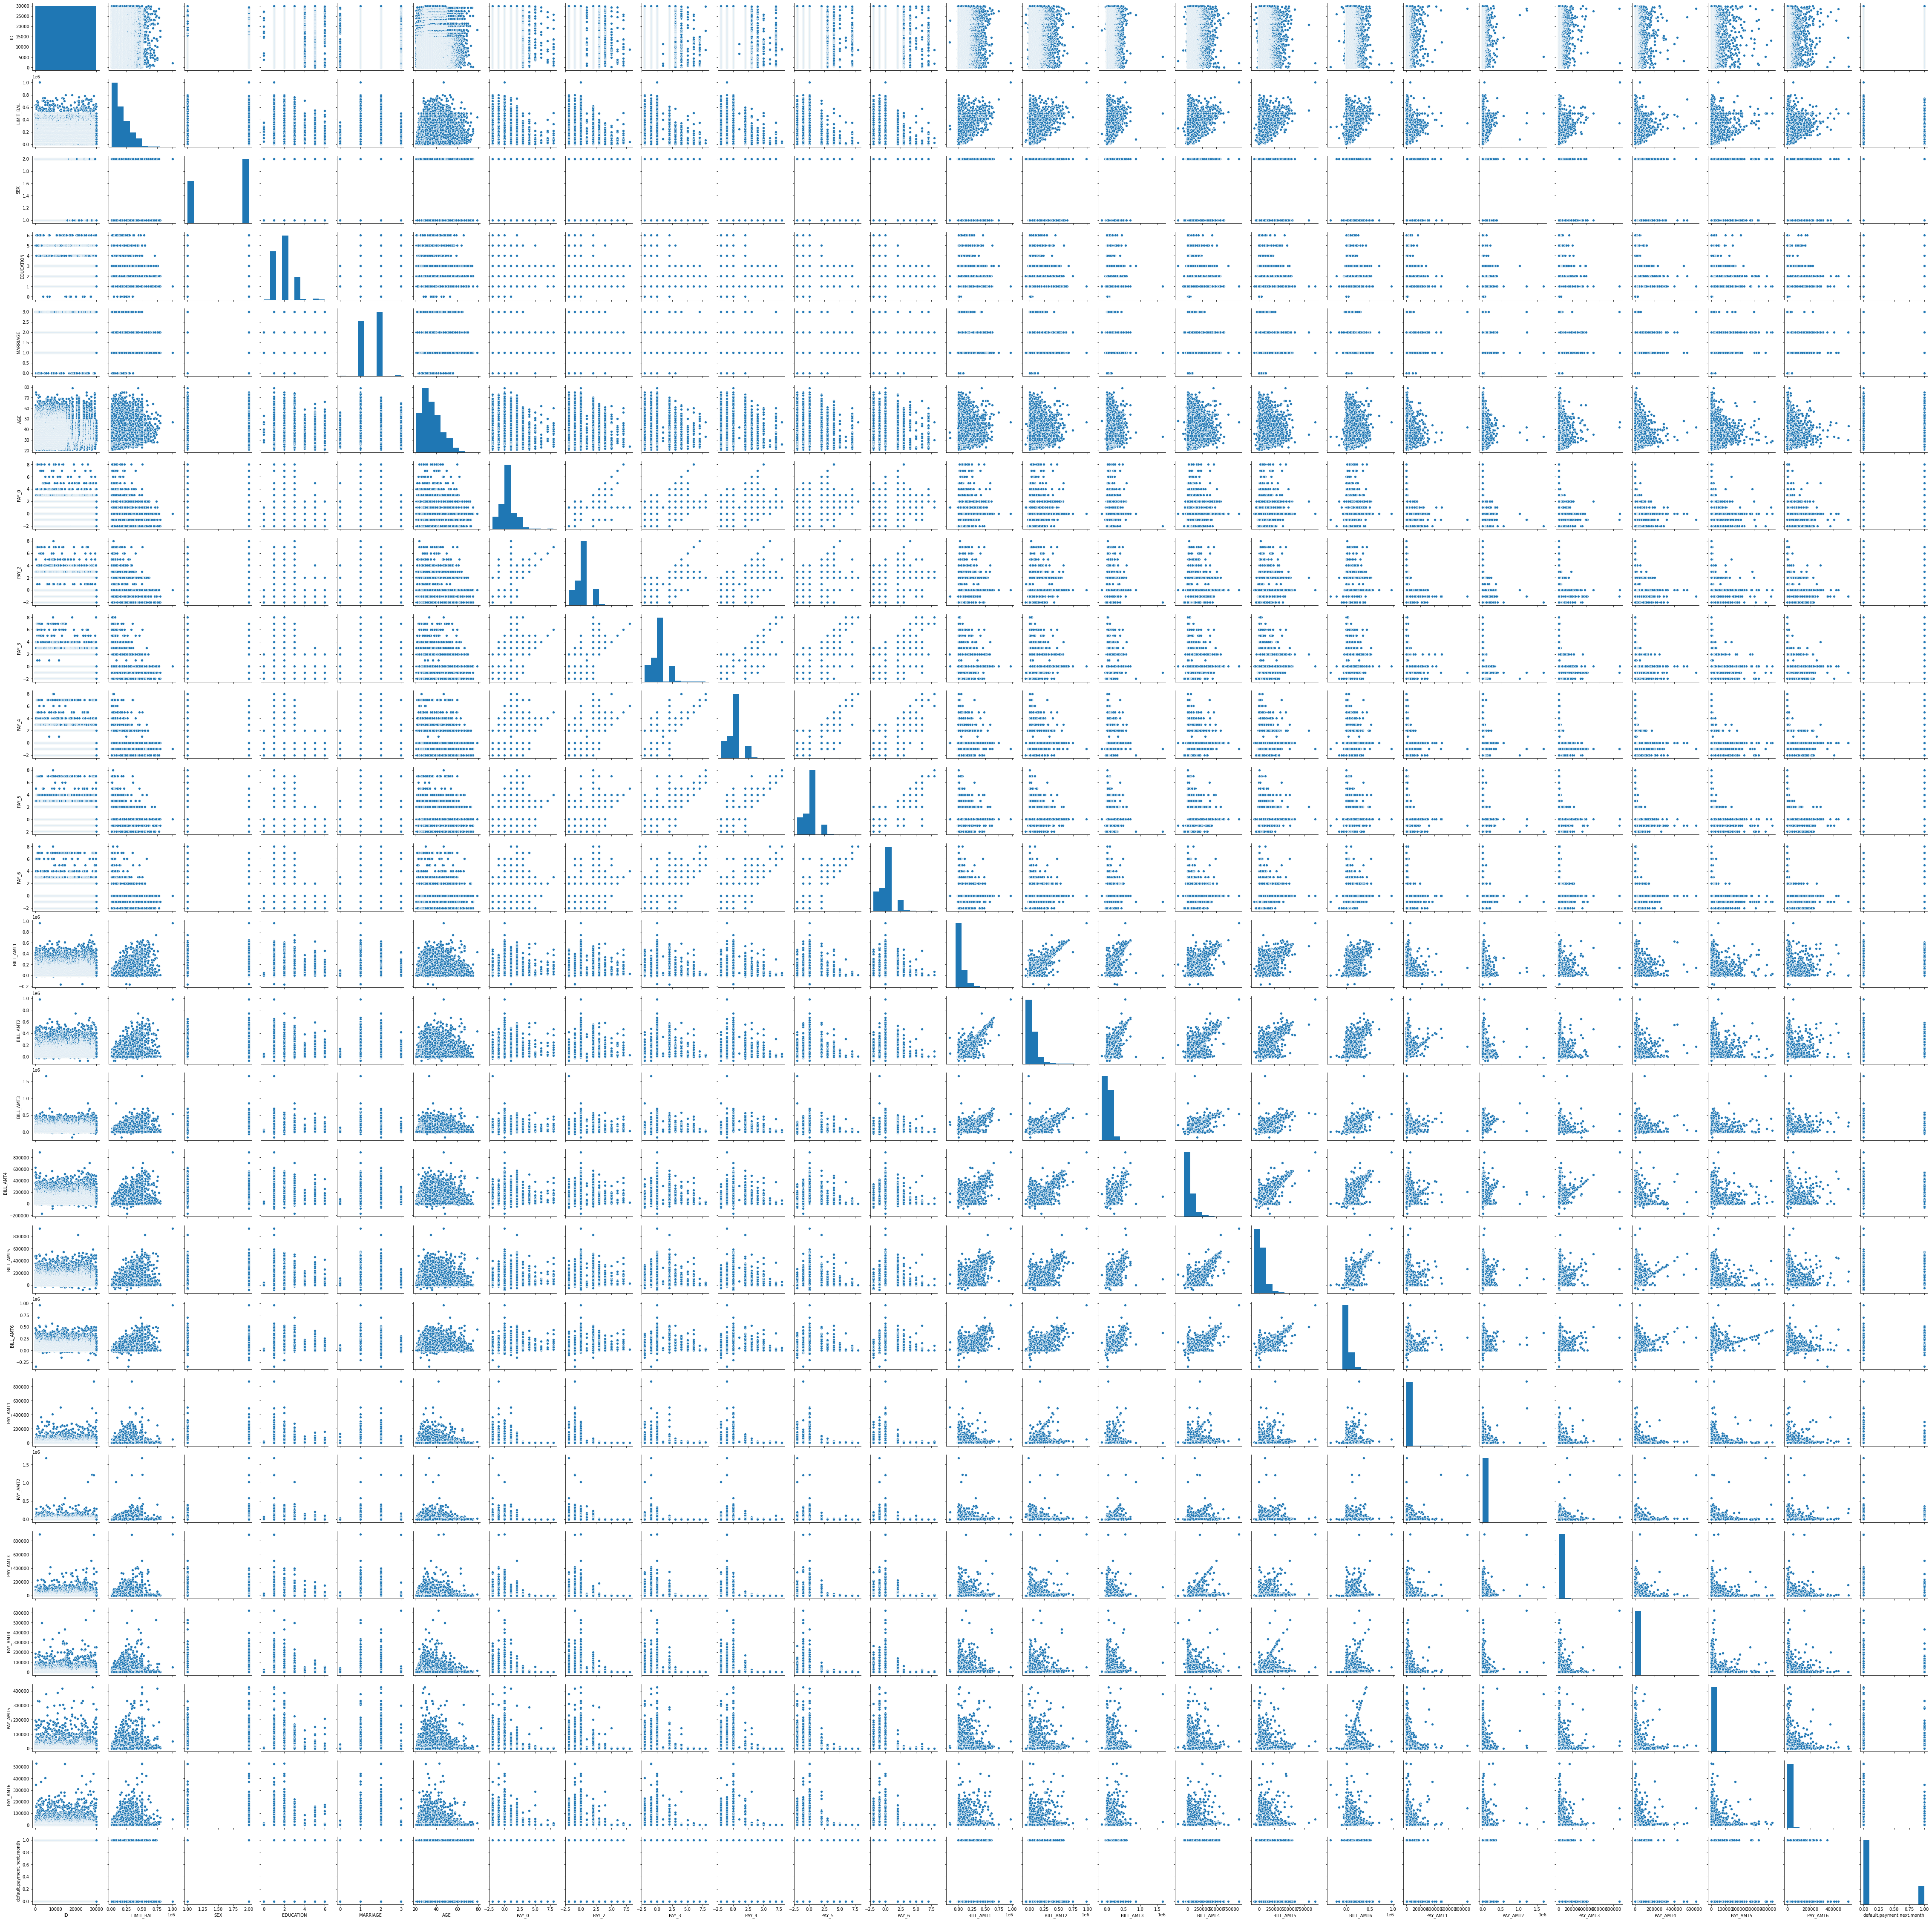

In [55]:
sns.pairplot(df)

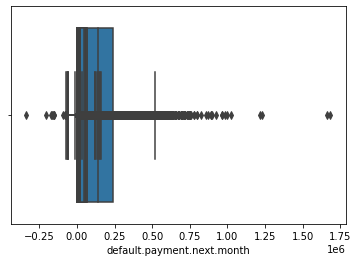

In [12]:
for i in df.columns:
    sns.boxplot(df[i])

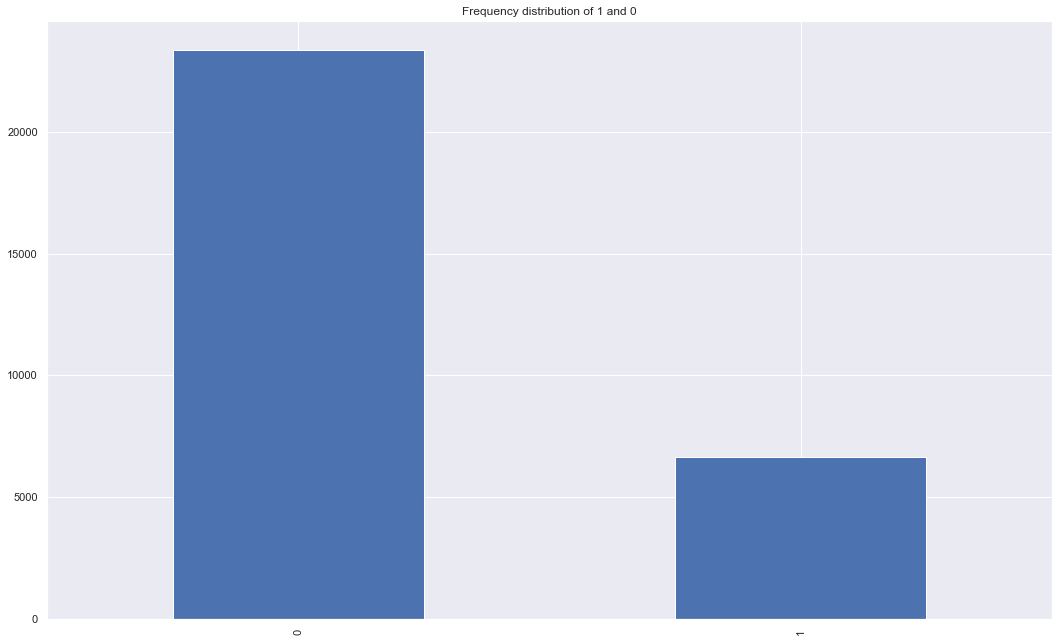

In [21]:
df['default.payment.next.month'].value_counts().plot(kind = 'bar')
plt.title('Frequency distribution of 1 and 0')
plt.savefig('distribution.png')

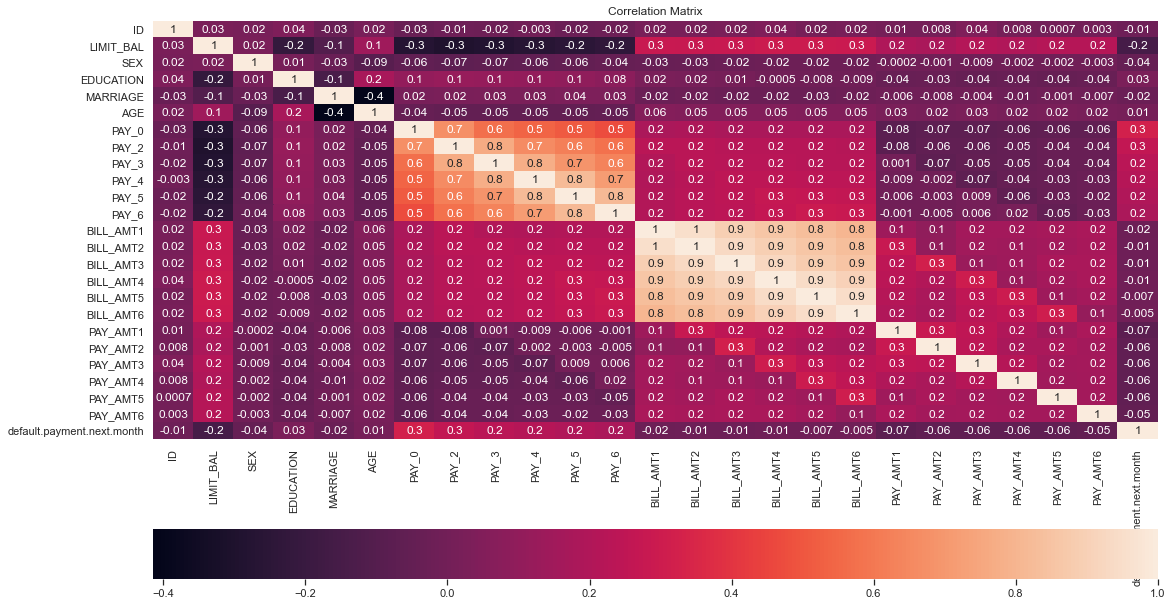

In [22]:
sns.set(rc={'figure.figsize':(18,11)})
g = sns.heatmap(df.corr(),annot=True,fmt='.1g',cbar_kws= {'orientation': 'horizontal'} )
plt.title('Correlation Matrix')
plt.savefig('heatmap.png')

Text(0.5, 1.0, 'PAY_AMT1')

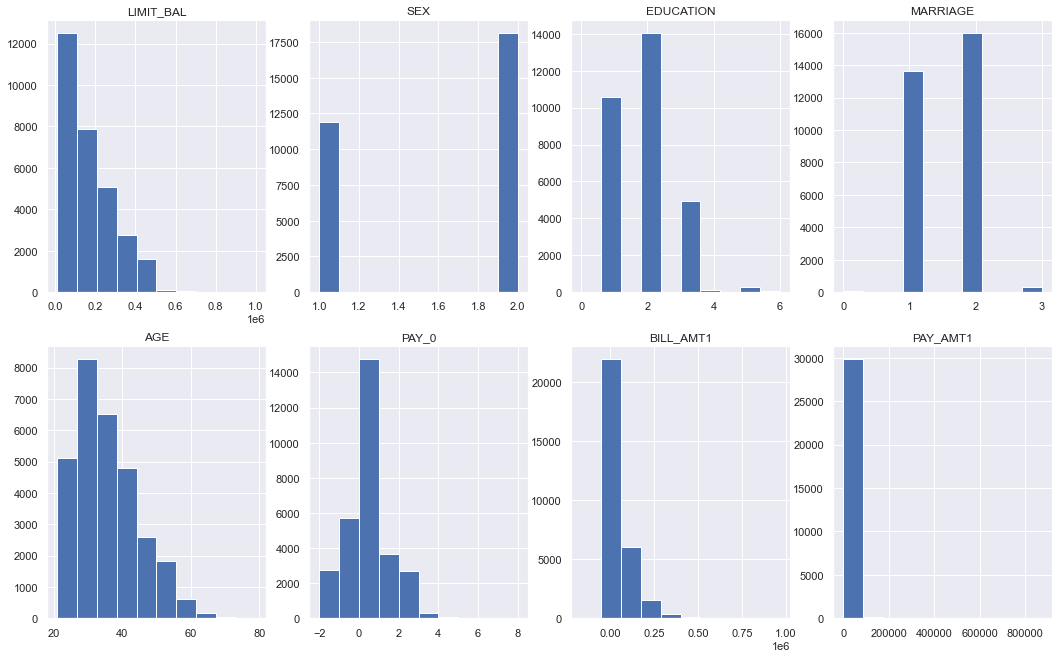

In [27]:
fig, axs = plt.subplots(2, 4)
axs[0,0].hist(df.LIMIT_BAL)
axs[0,0].set_title('LIMIT_BAL')

axs[0,1].hist(df.SEX)
axs[0,1].set_title('SEX')

axs[0,2].hist(df.EDUCATION)
axs[0,2].set_title('EDUCATION')

axs[0,3].hist(df.MARRIAGE)
axs[0,3].set_title('MARRIAGE')

axs[1,0].hist(df.AGE)
axs[1,0].set_title('AGE')

axs[1,1].hist(df.PAY_0)
axs[1,1].set_title('PAY_0')

axs[1,2].hist(df.BILL_AMT1)
axs[1,2].set_title('BILL_AMT1')

axs[1,3].hist(df.PAY_AMT1)
axs[1,3].set_title('PAY_AMT1')